In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
data = pd.read_csv("Candidate2.csv")
data.head()

,Run,Event,type1,E1,px1,py1,pz1,pt1,eta1,phi1,Q1,type2,E2,px2,py2,pz2,pt2,eta2,phi2,Q2
0,165617,75100943,G,6.2039,-4.2666,0.4565,-4.4793,4.2910,-0.9121,3.0350,-1,G,9.6690,7.2740,-2.8211,-5.7104,7.8019,-0.6786,-0.3700,1
1,165617,75587682,G,19.2892,-4.2121,-0.6516,18.8121,4.2622,2.1905,-2.9881,-1,G,9.8244,4.3439,-0.4735,8.7985,4.3697,1.4497,-0.1086,1
2,165617,75167029,G,9.7583,2.3903,-3.7824,8.6715,4.4744,1.4156,-1.0072,-1,G,13.5684,-3.3975,5.1910,12.0665,6.2039,1.4187,2.1503,1
3,165617,75281957,G,9.6365,1.6516,-5.4313,7.7862,5.6769,1.1213,-1.2756,1,G,7.0263,-1.6449,4.4418,5.1887,4.7366,0.9473,1.9255,-1
4,165617,75393376,G,6.0112,3.3614,2.8883,4.0598,4.4318,0.8208,0.7098,-1,G,7.7557,-5.0416,-3.0126,5.0642,5.8731,0.7806,-2.6030,1


In [3]:
invariant_mass = np.sqrt(2*data.pt1*data.pt2*(np.cosh(data.eta1 - data.eta2) - np.cos(data.phi1 - data.phi2)))

In [4]:
print(invariant_mass)

0        11.551450
1         9.160949
2        10.536990
3        10.405661
4        10.168314
           ...    
19995    11.939627
19996    11.072812
19997    11.953216
19998     9.664299
19999    11.661996
Length: 20000, dtype: float64


In [5]:
dataset = data.assign(M=invariant_mass)
dataset.head()

,Run,Event,type1,E1,px1,py1,pz1,pt1,eta1,phi1,...,type2,E2,px2,py2,pz2,pt2,eta2,phi2,Q2,M
0,165617,75100943,G,6.2039,-4.2666,0.4565,-4.4793,4.2910,-0.9121,3.0350,...,G,9.6690,7.2740,-2.8211,-5.7104,7.8019,-0.6786,-0.3700,1,11.551450
1,165617,75587682,G,19.2892,-4.2121,-0.6516,18.8121,4.2622,2.1905,-2.9881,...,G,9.8244,4.3439,-0.4735,8.7985,4.3697,1.4497,-0.1086,1,9.160949
2,165617,75167029,G,9.7583,2.3903,-3.7824,8.6715,4.4744,1.4156,-1.0072,...,G,13.5684,-3.3975,5.1910,12.0665,6.2039,1.4187,2.1503,1,10.536990
3,165617,75281957,G,9.6365,1.6516,-5.4313,7.7862,5.6769,1.1213,-1.2756,...,G,7.0263,-1.6449,4.4418,5.1887,4.7366,0.9473,1.9255,-1,10.405661
4,165617,75393376,G,6.0112,3.3614,2.8883,4.0598,4.4318,0.8208,0.7098,...,G,7.7557,-5.0416,-3.0126,5.0642,5.8731,0.7806,-2.6030,1,10.168314


In [6]:
dataset.M.describe()

count    20000.000000
mean        10.208665
std          0.991407
min          7.355223
25%          9.447532
50%         10.155365
75%         11.013376
max         24.099924
Name: M, dtype: float64

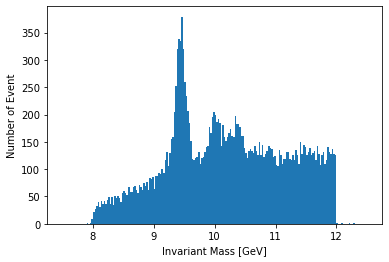

In [22]:
plt.hist(dataset.M, bins=200,range=[7.5,12.5])
plt.xlabel("Invariant Mass [GeV]")
plt.ylabel("Number of Event")
plt.show()

In [19]:
newdata = dataset[(dataset.M >= 9.3) & (dataset.M <= 9.6)]
print(newdata.M)

10       9.358983
18       9.397436
23       9.595488
33       9.586009
35       9.429119
           ...   
19955    9.506853
19978    9.484295
19987    9.413831
19992    9.376643
19994    9.425966
Name: M, Length: 3192, dtype: float64


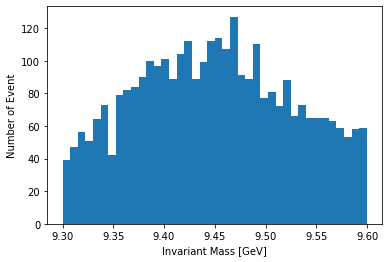

In [24]:
plt.hist(newdata.M, bins=100)
plt.xlabel("Invariant Mass [GeV]")
plt.ylabel("Number of Event")
plt.show()

In [25]:
newdata.M.describe()

count    3192.000000
mean        9.449731
std         0.076913
min         9.300015
25%         9.389175
50%         9.449002
75%         9.509029
max         9.599841
Name: M, dtype: float64

In [26]:
se = np.std(newdata.M)/np.sqrt(newdata.shape[0])
se

0.0013611330995995418

ได้
mean = 9.449731, 
Standard Deviation = 0.076913, 
Standard Error = $ \frac{Standard Deviation}{\sqrt(n)} $ = 0.001361

เพราะฉะนั้น อนุภาคที่พบ คือ Upsilon Meson เพราะมีมวลใกล้เคียงกับค่าจริงซึ่งคือ 9.46 GeV